<h1> Telco Customer Churn Data Prep and KPIs </h1>

The dataset I have chosen focuses on telephone company (Telco) customer data and comes from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn/data). <br>
The below steps include some of the data preparation steps necessary to analyze customer churn data, as well as three KPIs (Key Performance Indicators) for determining the success of the company sales team.

In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np

<h3> Data Prep </h3>

Step 1: Load Data <br>
Read the csv file into a pandas DataFrame object using the read_csv method. <br>
Check the first five rows to ensure that data looks like it loaded properly.

In [2]:
# Read the churn data into a dataframe object. Store in variable customers
customers = pd.read_csv("/Users/natanbienstock/Documents/Grad School/Spring 2020/DAV 6050/Assignments/Week 4/WA_Fn-UseC_-Telco-Customer-Churn.csv",
                       header = 0)
# Return first 5 rows of data
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Step 2: Check for Empty Rows<br>
Call the shape attribute of the customers dataframe to return the number of rows and columns in the dataframe. <br>
There are 7043 rows in the dataframe and 21 columns. <br>
Then call the dropna method on the customers dataframe with parameters how = all and inplace = True to delete all rows that are empty and store them in the current dataframe. <br>
Call the shape attribute of the dataframe again to see how many rows were empty and deleted. <br>
There were no empty rows in the dataframe, as the number of rows is still 7043.

In [3]:
# Return the number of rows and columns in the dataframe
customers.shape

(7043, 21)

In [4]:
# Drop all empty rows from the dataframe
customers.dropna(how = 'all', inplace = True)
# Return the number of rows and columns in the dataframe
customers.shape

(7043, 21)

Step 3: Check for Duplicates <br>
Call the duplicated method to return a Series of True and False values for every row in the dataframe that is True if the row is a duplicate and false otherwise. <br>
Call the sum method on that return to get the number of True values (True = 1, False = 0), or duplicate rows. <br>
The return value is 0 which means there are no duplicate rows in the dataset.

In [5]:
# Return the total number of duplicate rows in the dataframe
customers.duplicated().sum()

0

Step 4: Rename Columns <br>
Return a list of column names using the columns attribute of the customers dataframe.<br>
Use the rename method to rename all column names that begin with a lowercase letter to begin with an uppercase letter.

In [6]:
# Return the names of the column in the dataframe
customers.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Rename the column names that start with lower case letters
customers.rename(columns = {'customerID':'CustomerID', 'gender':'Gender', 'tenure':'Tenure'}, inplace = True)

Step 5: Check for Errors in Categorical Columns <br>
Call the value_counts method on each categorical variable in the dataframe to check whether there were any bad data in the colum. <br>
The value_counts method returns the number of occurrences of each value in a column. <br>
This can help you easily see whether there is bad data in the column if you see an unexpected value returned. <br>
After calling the value_counts method on all categorical columns, there were no unexpected values, meaning there is no obviously bad data in those columns. 

In [8]:
# Return the occurences of each value in Gender column
customers.Gender.value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [9]:
# Return the occurences of each value in SeniorCitizen column

customers.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [10]:
# Return the occurences of each value in Partner column

customers.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [11]:
# Return the occurences of each value in Dependents column

customers.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [12]:
# Return the occurences of each value in PhoneService column

customers.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [13]:
# Return the occurences of each value in MultipleLines column

customers.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [14]:
# Return the occurences of each value in InternetService column

customers.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [15]:
# Return the occurences of each value in OnlineSecurity column

customers.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [16]:
# Return the occurences of each value in OnlineBackup column

customers.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [17]:
# Return the occurences of each value in DeviceProtection column

customers.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [18]:
# Return the occurences of each value in TechSupport column

customers.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [19]:
# Return the occurences of each value in StreamingTV column

customers.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [20]:
# Return the occurences of each value in StreamingMovies column

customers.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [21]:
# Return the occurences of each value in Contract column

customers.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [22]:
# Return the occurences of each value in PaperlessBilling column

customers.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [23]:
# Return the occurences of each value in PaymentMethod column

customers.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [24]:
# Return the occurences of each value in Churn column

customers.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Step 6: Check for Outliers in Numeric Columns <br>
Call the skew method on the numeric columns to determine whether there are any outliers in the data. <br>
Ideally, skew should be between -1 and 1 so a skew greater than 1 indicates that there are extreme high values, and less than -1 indicates that there are extreme low values. <br>
The three numeric columns in the dataset all have skew between -1 and 1 indicating that there are no outliers. <br> <br>
In order to complete the above check on the TotalCharges column, I needed to convert the column to a numeric column. <br>
This is because there are 11 blank values in the column, which occurs when the customer has not yet been with the company for a month (so they have not yet been charged). <br>
I chose to change those blank values to the monthly charge rate, and treat those customers as if they had already been charged. <br>
I used numpy's where method to set the value of the TotalCharges column to be the value of the MonthlyCharges column where the TotalCharges column was blank, and to be the current TotalCharges value otherwise.<br>
This allowed me to then convert the datatype of the column to a numeric type using the astype method with parameter float, and proceed to find the skew of the column. <br><br>
Additionally, I used seaborn's lmplot method to create a scatter plot (with a trend line) for the Tenure and Total Charges columns. <br>
I wanted to see whether, as expected, there was a positive correlation with no real outliers between the length of time that a customer has been with the company and how much they have been charged. <br>
There did not appear to be any outliers in the plot, so I concluded that there are no obvious numeric outliers in the dataset.

In [25]:
# Return the skew of the Tenure column

customers.Tenure.skew()

0.2395397495619829

In [26]:
# Return the skew of the MonthlyCharges column

customers.MonthlyCharges.skew()

-0.22052443394398033

In [27]:
# Set the TotalCharges to be the MonthlyCharges where the TotalCharges is blank (" ")
# and retain the current TotalCharges value otherwise

customers['TotalCharges'] = np.where(customers.TotalCharges == " ", customers.MonthlyCharges, customers.TotalCharges)

In [28]:
# Convert the TotalCharges column to be of type float

customers.TotalCharges = customers.TotalCharges.astype(float)

In [29]:
# Return the skew of the TotalCharges column

customers.TotalCharges.skew()

0.9633155974592842

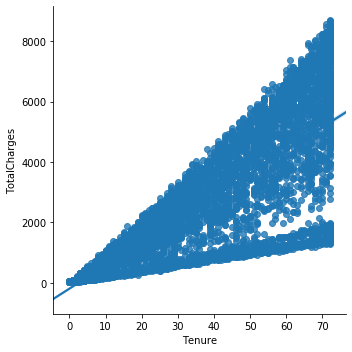

In [30]:
# Create a scatter plot with a trend line of Tenure vs. TotalCharges

sns.lmplot(x = "Tenure", y = "TotalCharges", data = customers)

Step 7: Create AverageCharge Column<br>
I used numpy's where method to create a new column called AverageCharge in the dataset. <br>
The AverageCharge is defined as the TotalCharges divided by the Tenure for each customer. <br>
When tenure is zero, the AverageCharge is defined as the TotalCharges for the customer. <br>

In [31]:
# Set AverageCharge to be the TotalCharges where the Tenure is 0
# and the TotalCharges divided by the Tenure otherwise.

customers['AverageCharge'] = np.where(customers.Tenure == 0, customers.TotalCharges, customers.TotalCharges/customers.Tenure)

Step 8: Create Bins for Numeric Columns (Add Categorical Columns for Numeric Columns) <br>
I used the cut method in pandas to create categorical bins for each of the numeric columns in the dataframe. <br>
I decided to bin the columns into 4 bins, which is the parameter besides for the column name in the cut method. <br>
I created 4 new columns for these categorical values: TenureBins (for Tenure), MonthlyChargeBins (for MonthlyCharge), TotalChargeBins (for TotalCharge), and AverageChargeBins (for AverageCharge). 

In [32]:
# Divide Tenure into 4 bins and set the TenureBins column to be the bin for each customer's Tenure. 

customers['TenureBins'] = pd.cut(customers.Tenure, 4)

In [33]:
# Divide MonthlyCharges into 4 bins and set the MonthlyChargeBins column to be the bin 
# for each customer's MonthlyCharges

customers['MonthlyChargeBins'] = pd.cut(customers.MonthlyCharges,4)

In [34]:
# Divide TotalCharges into 4 bins and set the TotalChargeBins column to be the bin 
# for each customer's TotalCharges

customers['TotalChargeBins'] = pd.cut(customers.TotalCharges,4)

In [35]:
# Divide AverageCharge into 4 bins and set the AverageChargeBins column to be the bin 
# for each customer's AverageCharge

customers['AverageChargeBins'] = pd.cut(customers.AverageCharge,4)

<h3> KPIs </h3>

**KPI 1: Acquire 1500 New Customers by June 2020** <br>
An important metric for the company's success is how many new customers we are able to acquire. <br>
Acquiring more customers ensures that the company continues to grow which is how more money is made. <br>
A new customer is defined as any customer that has been with the company for three months or fewer. <br>
A value of 1 is added to the NewCustomer column if the value in the Tenure column is less than or equal to 3, and a value of 0 is added to the NewCustomer column if the value in the Tenure column is greater than 3. <br>
So each row either has a value of 1 or 0 in the NewCustomer column. <br>
There were 1062 new customers in the previous 3 months, and we would like to have 1500 new customers next quarter (by June 2020).

In [36]:
# Set NewCustomer column value to be 1 where Tenure is less than or equal to 3
customers.loc[customers['Tenure'] <=3, 'NewCustomer'] = 1

# Set NewCustomer column value to be 0 where Tenure is greater than 3
customers.loc[customers['Tenure'] >3, 'NewCustomer'] = 0

In [37]:
# Return the sum of the NewCustomer column (the number of new customers)
customers.NewCustomer.sum()

1062.0

**KPI 2: Have 5250 High-Paying Customers by June 2020** <br>
Not only does the company need to acquire more customers, but for the company to succeed, those customers also need to be paying the company a lot for service. <br>
A high-paying customer is defined as a customer who is paying more than 60 to the company per month, with a very high paying customer paying more than 70. <br>
The more high-paying and very high-paying customers that there are, the more money the company makes. <br>
A value of 1 is added to the MonthlyChargKPI column if the MonthlyCharges column has a value greater than or equal to 70, a value of 0 is added to the MonthlyChargKPI column if the MonthlyCharges column has a value greater than or equal to 60, and a value of -1 is added to the MonthlyChargKPI column if the MonthlyCharges column has a value less than 60. <br>
Each row either has a value of -1, 0, or 1 in the MonthlyChargeKPI column, as that is what it contributes to the KPI. <br>
There are currently 4136 high-paying customers, and we would like to have 5250 high-paying customers by June 2020.  

In [38]:
# Set MonthlyChargeKPI column value to be -1 where MonthlyCharges is less than 60
customers.loc[customers['MonthlyCharges'] <60, 'MonthlyChargeKPI'] = -1
# Set MonthlyChargeKPI column value to be 0 where MonthlyCharges is greater than or equal to 60
customers.loc[customers['MonthlyCharges'] >=60, 'MonthlyChargeKPI'] = 0
# Set MonthlyChargeKPI column value to be 1 where MonthlyCharges is greater than or equal to 70
customers.loc[customers['MonthlyCharges'] >=70, 'MonthlyChargeKPI'] = 1

In [39]:
# Return the value counts for each value in the MonthlyChargeKPI column
customers.MonthlyChargeKPI.value_counts()

 1.0    3591
-1.0    2907
 0.0     545
Name: MonthlyChargeKPI, dtype: int64

**KPI 3: Have 6300 Customers with Long-Term Contracts** <br>
The final important KPI is to have 6300 customers with long-term contracts by June 2020. <br>
It is important for our business to not only have more customers and have more high-paying customers, but to have more customers who are committed to having our service for at least 1 year. <br>
A customer with a long-term contract is defined as a customer who has at least a one year contract, with a customer with a two year contract being even better. <br>
A value of 1 is added to the LongTermContract column if the Contract column has a value of Two year, a value of 0 is added to the LongTermContract column if the Contract column has a value of One year, and a value of -1 is added to the LongTermContract column if the Contract column has a value of Month-to-month. <br>
Month to month customers are bad for our company as it is easier for them to switch providers as their contract ends more frequently.<bR>
Each row either has a value of -1, 0, or 1 in the LongTermContract column, as that is what it contributes to the KPI. <br>
There are currently 5348 customers on long term contracts, and we would like to have 6300 customers with long-term contracts by June 2020.

In [40]:
# Set LongTermContract value to be -1 where Contract value is Month-to-month
customers.loc[customers['Contract'] =='Month-to-month', 'LongTermContract'] = -1
# Set LongTermContract value to be 0 where Contract value is One year
customers.loc[customers['Contract'] =='One year', 'LongTermContract'] = 0
# Set LongTermContract value to be 1 where Contract value is Two year
customers.loc[customers['Contract'] =='Two year', 'LongTermContract'] = 1

In [41]:
# Return the value counts for each value in the LongTermContract column
customers.LongTermContract.value_counts()

-1.0    3875
 1.0    1695
 0.0    1473
Name: LongTermContract, dtype: int64